In [2]:
# A/B testing test Statistics for discrete(binomial) & Continuous Metrics
# Discrete Metrics: Click through rates, bounce rates, conversion rates

#Import the libraries and modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import binom
from scipy.stats import chi2_contingency, mannwhitneyu, t, ttest_ind

%matplotlib inline

In [8]:
# Specifying the random events(i.e click, bounce etc.) for the 2 groups of users randomly shown different ad designs/layouts
# Null hypothesis: Both ad designs are equivalently efficients i.e both variables/samples are independent

np.random.seed(42)

x = np.random.binomial(n=1, p=0.6, size= 18)
y= np.random.binomial(n=1, p=0.4, size= 23)

_, (a,c)=np.unique(x, return_counts=True)
_, (b,d)=np.unique(y, return_counts=True)


In [9]:
#Defining the Dataframe

df=pd.DataFrame(data=[[a,b],[c,d]],
                index=['click','no click'],
                columns=['A','B'])

m=df.values

print('-Observation:')
print(f"   -Version A: = {x}")
print(f"  -Version B: = {y}")
print("")
print(" - Contingent Table:")
display(df)


-Observation:
   -Version A: = [1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1]
  -Version B: = [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0]

 - Contingent Table:


,A,B
click,7,16
no click,11,7


In [6]:
#Fisher's Exact Test for Discrete metric for the Web ad Analytics

def hypergeom(k, K, n, N):
    """Probability mass funciton of the hypergeometric distribution."""
    return binom(K, k) * binom(N-K, n-k) / binom(N, n)

def fisher_prob(m):
    """Probability of a given observed contingency table according to Fisher's exact test."""
    ((a, b), (c ,d)) = m
    k = a
    K = a+b
    n = a+c
    N = a+b+c+d
    return hypergeom(k, K, n, N)

In [7]:
def fisher_probs_histogram(m):
    
    """Computes prob mass function histogram accroding to Fisher's exact test."""
    neg_val = -min(m[0,0], m[1,1])
    pos_val = min(m[1,0], m[1,0])
    probs = []
    for k in range(neg_val, pos_val+1):
        m1 = m + np.array([[1, -1], [-1, 1]]) * k
        probs.append(fisher_prob(m1))
    return probs

- Fisher's exact test: p-val = 6.4%


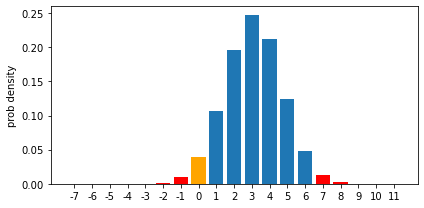

In [10]:
bars_h = np.array(fisher_probs_histogram(m))

f, ax = plt.subplots(figsize=(6, 3))
ii = np.arange(len(bars_h))
ax.bar(ii, bars_h)
idxs = bars_h <= fisher_prob(m)
ax.bar(ii[idxs], bars_h[idxs], color='r')
ax.set_ylabel("prob density")
p_val = bars_h[idxs].sum()
neg_val = -min(m[0,0], m[1,1])
pos_val = min(m[1,0], m[1,0])
ax.bar(ii[-neg_val], bars_h[-neg_val], color='orange')

ax.set_xticks(ii)
ax.set_xticklabels(np.arange(neg_val, pos_val+1))
f.tight_layout()
print(f"- Fisher's exact test: p-val = {100*p_val:.1f}%")

In [11]:
#Although Fisher's Exact test has the important advantage of computing exact p-values. If however we have a large sample size, 
#..., it would be computationally inefficient so, we use Pearson's Chi-squared test to compute an approximate p-value

chi2_val,p_val= chi2_contingency(m, correction= False)[:2]

print("- Pearson's chi-squared t-test:")
print(f"   - χ2 value: {chi2_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")

- Pearson's chi-squared t-test:
   - χ2 value: 3.858
   - p-value: 5.0%


In [ ]:
#Chi-squared test can also be used for non-normal observations if sample size is large enough, thanks to Central Limit Theorem

#Chi-square test of independence of variables in a contingency table.

#This function computes the chi-square statistic and p-value for the hypothesis test of independence of 
#the observed frequencies in the contingency table 1 observed. 
#The expected frequencies are computed based on the marginal sums under the assumption of independence;